In [19]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt
from matplotlib import ticker

from RachbaJunction import RachbaJunction
from RachbaJunction.utilities import *
from RachbaJunction.ScatteringMatrix import ScatteringMatrix

ev_to_j = 1.602176634e-19

hbar = 6.582119569e-16
m = 0.015*cc.m_e
h_xy = 0.1e-3*ev_to_j# mJ

# k_z = np.sqrt(2*m*h_xy/ev_to_j)/hbar
k_z = np.sqrt(2*m*h_xy)/cc.hbar# 1/Metr


x = 500e-9# Metr
x_prime =  k_z*x# adimensional
print(f"k_so {k_z}")
print(f"x' {x_prime}")

BASE_PATH = "plots/tesi/3_Transport_poroperties_RNW/"
print(BASE_PATH)

k_so 6274572.777578376
x' 3.137286388789188
plots/tesi/3_Transport_poroperties_RNW/


In [20]:
def renormallize_result(res, dy = 10):
#     x_int = x
#     res_int = res
    for v in res.values():
        for i in v:
            pos = np.where(np.abs(np.diff(i)) >= dy)[0]
            if len(pos) != 0:
                i[pos] = np.nan
            pos = 0


def adjuct_Tick(axs, **kwarg):
    
    if len(axs.shape) == 1:
        ax = axs.reshape(axs.shape[0], 1)
        for k in kwarg.keys():
            if k != "size":
                kwarg[k] = kwarg[k].reshape(axs.shape[0], 1)
    else:
        ax = axs
    
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
                ax[i, j].tick_params(axis='x', labelsize=kwarg["size"])
                ax[i, j].tick_params(axis='y', labelsize=kwarg["size"])
    
                ax[i, j].xaxis.set_major_locator(ticker.MultipleLocator(kwarg["x_magior"][i, j]))
                ax[i, j].xaxis.set_minor_locator(ticker.MultipleLocator(kwarg["x_minor"][i, j]))

                ax[i, j].xaxis.set_ticks_position('both')
    
                ax[i, j].yaxis.set_major_locator(ticker.MultipleLocator(kwarg["y_magior"][i, j]))
                ax[i, j].yaxis.set_minor_locator(ticker.MultipleLocator(kwarg["y_minor"][i, j]))

                ax[i, j].yaxis.set_ticks_position('both')
    
                ax[i, j].tick_params(which='major', width=1.00, length=5)
                ax[i, j].tick_params(which='minor', width=0.75, length=2.5, labelsize=10)

# Plot set up

In [21]:
font = {'family': "Times New Roman", "size": 20}

y_label = [r"$$\frac{2 \pi \hbar}{q^2} G$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
y_label_pos = [(-.05, 1), (-.09, 1)]

legend_font_size = 20


# Single interface case



## $E_{so, R} \gg h_\perp$

### T vs $\alpha_L/\alpha_R$ at constant energy

In [37]:
alp_r = 10
Eso_profile = [-1, alp_r]
x_profile = [0]

junction = RachbaJunction([x_profile, Eso_profile])

def g(x, par):
#     junction[1] = -par
    if par < -1 and np.abs(x) < 0.5 or -np.abs(x)*(1+(1/(2*np.abs(x)))**2) > par:
        return np.nan
    else:
        junction[0] = x
        S = junction.get_scattering_matrix(par)
        if not S.is_unitary:
            print(f"not unitary matrix length: {x}, E_so: {par}")
            return np.nan
        else:
            return S.t_coef
        
def gp(x, par):
    dx = 0.0001
    if (par+dx) < -1 and np.abs(x) < 0.5 or -np.abs(x)*(1+(1/(2*np.abs(x)))**2) > (par+dx):
        return np.nan
    else:
        junction[0] = x
        S1 = junction.get_scattering_matrix(par-dx/2)
        S2 = junction.get_scattering_matrix(par+dx/2)
        if not S1.is_unitary and S2.is_unitary:
            print(f"not unitary matrix length: {x}, E_so: {par}")
            return np.nan
        else:
            return (-S1.t_coef + S2.t_coef)/dx
    
alpha_l = np.arange(-16, 16, 0.005)
enn = [0, 1.2, -1.02]
# enn = [0, 0.5, -0.9, 1.2, -1.02]
trasmission_coeff_total = make_grid(alpha_l, enn, [g, gp])


KeyboardInterrupt: 

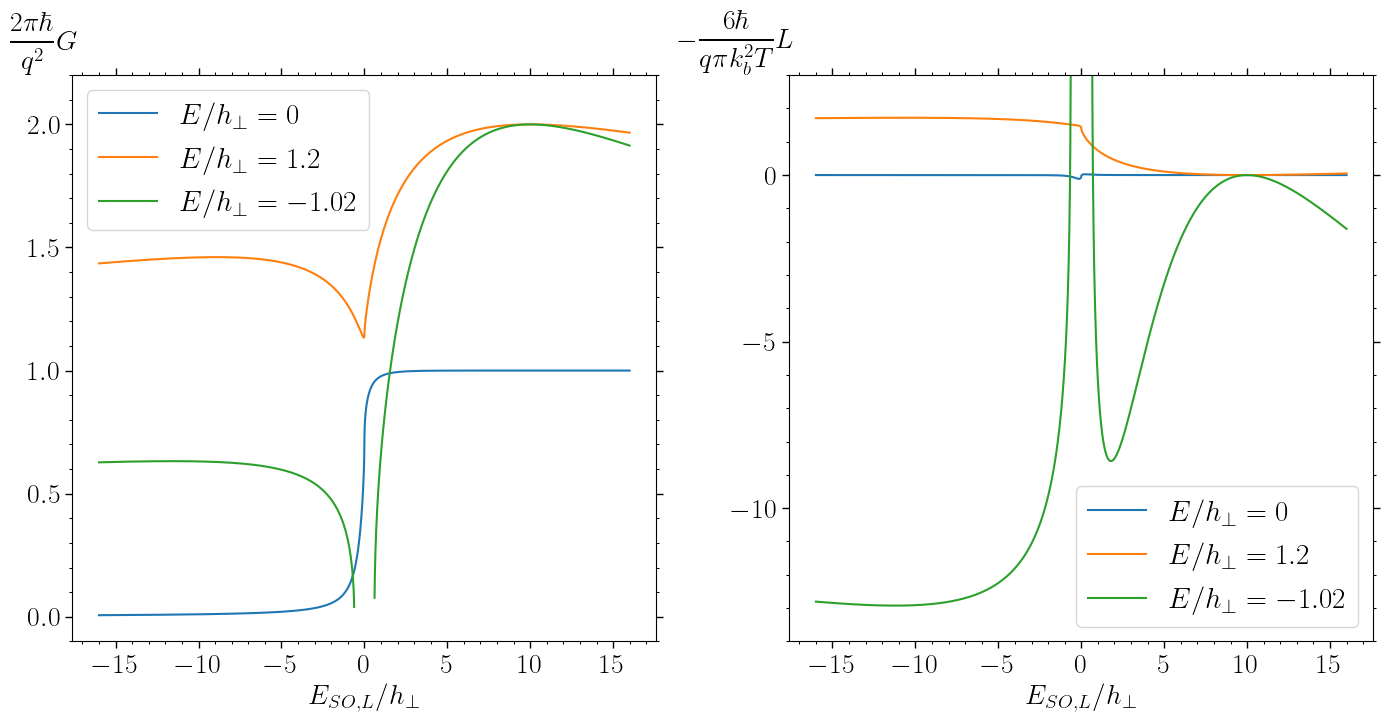

In [85]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

# renormallize_result(trasmission_coeff_total)

fig, axs = plt.subplots(1, 2, figsize=(14, 7), dpi=100, tight_layout=True, facecolor='white')


# y_label = ["T", r"$$\frac{dT}{dE}$$"]
# font = {'family': "Times New Roman", "size": 25}

y_label_pos = [(-.05, 1), (-.09, 1)]

k = list(trasmission_coeff_total.keys())
n = 0
for j in range(len(trasmission_coeff_total)):
    
    for ii in range(2):
        
        axs[ii].plot(alpha_l, 
                trasmission_coeff_total[k[j]][ii],
                label=fr"$$ E/ h_{{\perp}} = {k[j]}$$")

        axs[ii].legend(fontsize = legend_font_size)
#         axs[ii].grid(True)#which='both')
        axs[ii].set_xlabel(r"$$E_{{SO,L}}/h_\perp$$", fontdict=font)
        axs[ii].set_ylabel(y_label[ii], rotation=0, fontdict=font)
        axs[ii].yaxis.set_label_coords(*y_label_pos[ii])
        
legend_font_size = 21

x_magior = np.array([5, 5])
x_minor = np.array([1, 1])

y_magior = np.array([0.5, 5])
y_minor = np.array([0.1, 1])
adjuct_Tick(axs, x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


axs[0].set_ylim(-.1, 2.2)
axs[1].set_ylim(-14, 3)


plt.savefig(BASE_PATH+"T(E_[so, l])_for_constant_energy_and_E_[so,R]>>h_perp.pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

### T vs E at constant $\alpha_L/\alpha_R$

In [38]:

alp_r = 10
Eso_profile = [-1, alp_r]
x_profile = [0]

junction = RachbaJunction([x_profile, Eso_profile])

# trasmission_coeff = {}
# trasmission_coeff_deriv = {}
    
def g(x, par):
#     junction[1] = -par
    if x < -1 and np.abs(par) < 0.5 or -np.abs(par)*(1+(1/(2*np.abs(par)))**2) > x:
        return np.nan
    else:
        junction[0] = par
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: {x}, E_so: {par}")
            return np.nan
        else:
            return S.t_coef


def gp(x, par):
    dx = 0.0001
#     junction[1] = -par
    if (x+dx) < -1 and np.abs(par) < 0.5 or -np.abs(par)*(1+(1/(2*np.abs(par)))**2) > (x+dx):
        return np.nan
    else:
        junction[0] = par
        S1 = junction.get_scattering_matrix(x-dx/2)
        S2 = junction.get_scattering_matrix(x+dx/2)
        if not S1.is_unitary and S2.is_unitary:
            print(f"not unitary matrix length: {x}, E_so: {par}")
            return np.nan
        else:
            return (-S1.t_coef + S2.t_coef)/dx       

# alpha_l = [-alp_r, alp_r, -0.4, 0.4, -0.2, 0.2]
alpha_l = [alp_r, 0.3]
enn = np.arange(-1.5, 2, 0.011)
trasmission_coeff_total = make_grid(enn, alpha_l, [g, gp])


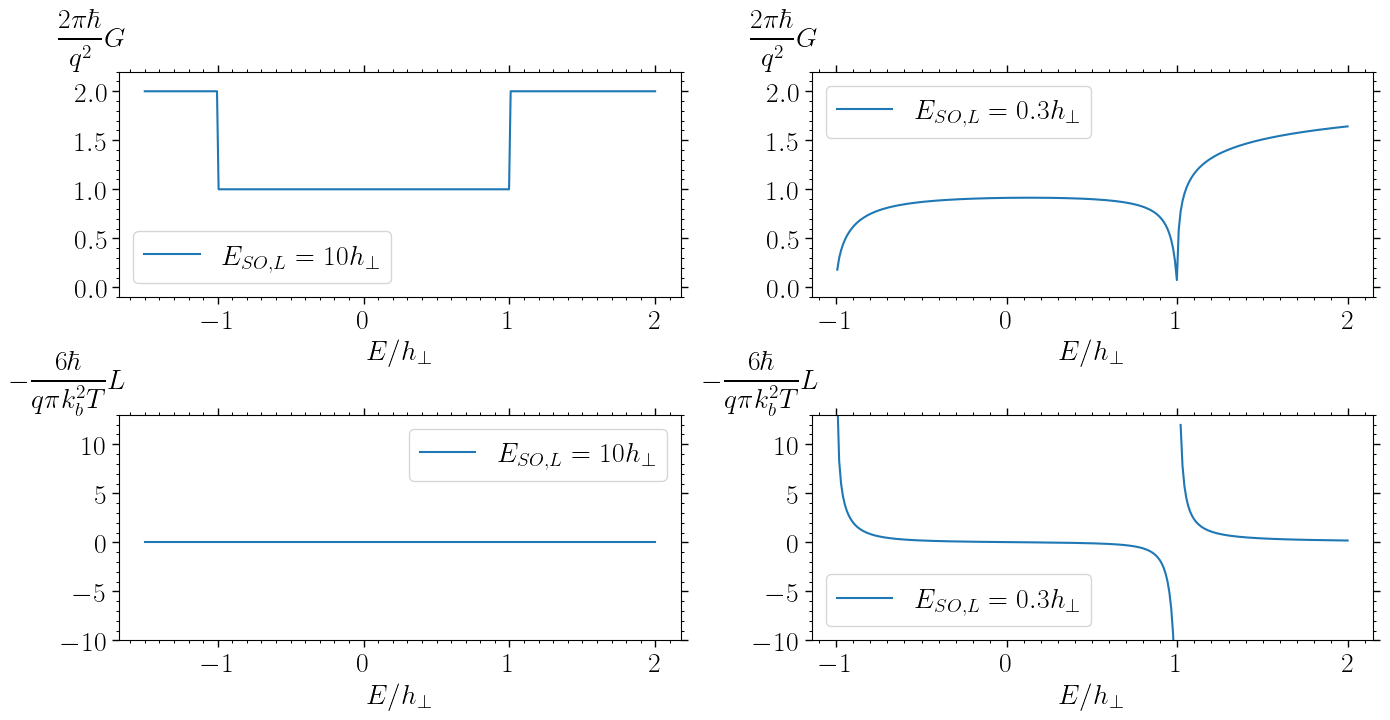

In [39]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

renormallize_result(trasmission_coeff_total)

fig, axs = plt.subplots(2, 2, figsize=(14, 7), dpi=100, tight_layout=True, facecolor='white')


y_label_pos = [(-.05, 1), (-.09, 1)]

# line_label =  r"$$ \alpha_l/\alpha_r = {0}$$"
line_label = r"$$ E_{{SO,L}} = {0}h_\perp$$"

# y_label = [r"$$\frac{2 \pi \hbar}{q^2} G$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# font = {'family': "Times New Roman", "size": 20}
# legend_font_size = 20

k = list(trasmission_coeff_total.keys())
n = 0
for i in range(2):
    axs[0, i].plot(enn, trasmission_coeff_total[k[n]][0], 
                   label=line_label.format(k[n]))
#                    label=line_label.format(k[n]/alp_r))
#     axs[0, i].plot(enn, trasmission_coeff_total[k[n+1]][0], 
#                                     label=line_label.format(k[n+1]/alp_r))
# #                                     label=line_label f"{k[n+1]/alp_r}")
    
    axs[1, i].plot(enn, trasmission_coeff_total[k[n]][1], 
                                    label=line_label.format(k[n]))
#                                     label=line_label.format(k[n]/alp_r))
#     axs[1, i].plot(enn, trasmission_coeff_total[k[n+1]][1], 
#                                     label=line_label.format(k[n+1]/alp_r))
# #                                     label=line_label f"{k[n+1]/alp_r}")
    n += 1

    for j in range(2):
        axs[j, i].legend(fontsize = legend_font_size)
#         axs[i, j].grid(True)#which='both')
        axs[j, i].set_xlabel(r"$$E/ h_{\perp}$$", fontdict=font)
        axs[j, i].set_ylabel(y_label[j], rotation=0, fontdict=font)# , loc = 'top'
        axs[j, i].yaxis.set_label_coords(*y_label_pos[j])
        

    axs[1, i].set_ylim(-10, 13)
    axs[0, i].set_ylim(-.1, 2.2)



x_magior = np.array([[1, 1, 1], [1, 1, 1]])
x_minor = np.array([[0.1, 0.1, .1], [0.1, 0.1, .1]])

y_magior = np.array([[0.5, 0.5, 0.5], [5, 5, 5]])
y_minor = np.array([[0.1, 0.1, 0.1], [1, 1, 1]])
adjuct_Tick(axs, x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# fig.suptitle(fr"$$E_{{so, R}} = {alp_r} h_\perp$$", fontsize=font["size"], y = 1.01)
      
plt.savefig(BASE_PATH+"T(E)_for_E_[so,R]>>h_perp.pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

# 2 interfaces

## Lead Model $0 | \alpha | 0$

### T vs $E$ for fixed $E_{so}$, $d$

In [26]:
alp_r = 10
Eso_profile = [0, alp_r, 0]
x_profile = [0, 1]

junction = RachbaJunction([x_profile, Eso_profile])


def g(x, par):
    junction[1] = par[1]
    junction.interface[0] = -par[0]/2
    junction.interface[1] = par[0]/2
        
    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: {x}, E_so: {par}")
        return np.array([np.nan, np.nan])
    else:
        return S.t_coef
    

def gp(x, par):
    dx = 0.0001
    junction[1] = par[1]
    junction.interface[0] = -par[0]/2
    junction.interface[1] = par[0]/2
    
    S1 = junction.get_scattering_matrix(x-dx/2)
    S2 = junction.get_scattering_matrix(x+dx/2)
    if not S1.is_unitary and S2.is_unitary:
        print(f"not unitary matrix length: {x}, E_so: {par}")
        return np.array([np.nan, np.nan])
    else:
        return (-S1.t_coef + S2.t_coef)/dx

param = [(0.3, 0.4), (0.3, 10), (1, 0.4), (1, 10)]
en = np.arange(-0.999, 2, 0.011)
trasmission_coeff_total = make_grid(en, param, [g, gp])

renormallize_result(trasmission_coeff_total, dy=7)

(0.3, 0.4)
(0.3, 10)


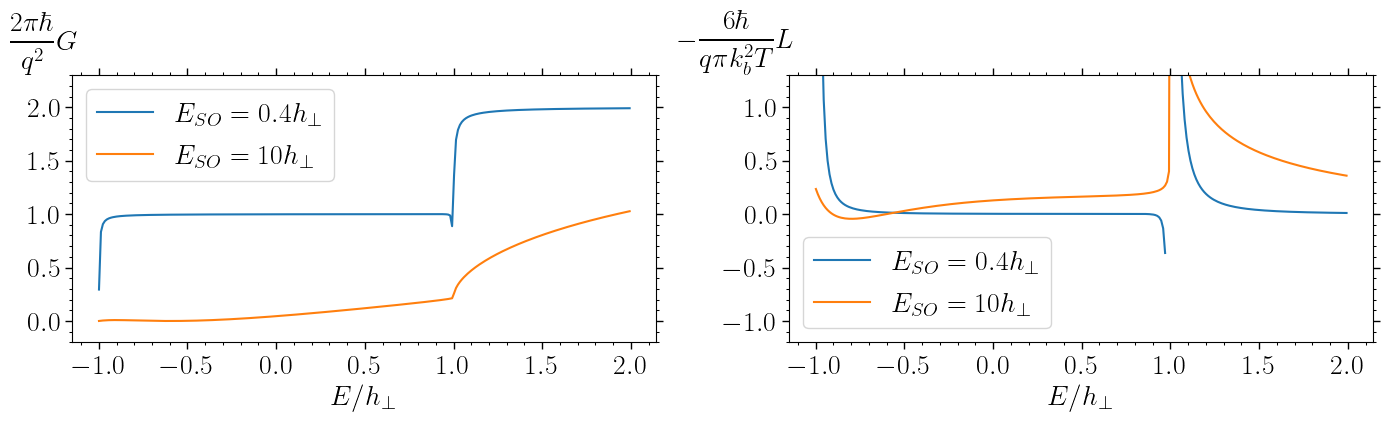

In [28]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, 2, figsize=(14, 4), dpi=100, tight_layout=True, facecolor='white')


# y_label = ["T", r"$$\frac{dT}{dE}$$"]
# font = {'family': "Times New Roman", "size": 25}

y_label_pos = [(-.05, 1), (-.09, 1)]

k = list(trasmission_coeff_total.keys())

n = 0
for j in range(len(k)//2):
    for ii in range(2):
        
        axs[ii].plot(en, 
                trasmission_coeff_total[k[n+j]][ii], 
                label=fr"$$E_{{SO}} = {k[n+j][1]}h_{{\perp}}$$")
#                 label=fr"$$L = {k[n+j][0]} k_z$$"+"\n"+fr"$$E_{{SO}} = {k[n+j][1]}h_{{\perp}}$$")
#         axs[ii].plot(en, 
#                 trasmission_coeff_total[k[n+1]][ii], 
#                 label=fr"$$L = {k[n+1][0]} k_z$$"+"\n"+fr"$$E_{{SO}} = {k[n+1][1]}h_{{\perp}}$$")

        axs[ii].legend(fontsize = legend_font_size)
#         axs[ii].grid(True)#which='both')
        axs[ii].set_xlabel(r"$$E/h_\perp$$", fontdict=font)
        axs[ii].set_ylabel(y_label[ii], rotation=0, fontdict=font)
        axs[ii].yaxis.set_label_coords(*y_label_pos[ii])

    print(k[n+j])
        


axs[0].set_ylim(-0.2, 2.3)
axs[1].set_ylim(-1.2, 1.3)
    

x_magior = np.array([.5, .5])
x_minor = np.array([0.1, 0.1])

y_magior = np.array([0.5, .5])
y_minor = np.array([0.1, 0.1])
adjuct_Tick(axs, x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])




plt.savefig(BASE_PATH+"1_T(E)_for_E_[so,R]>>h_perp(0|alpha|0).pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

(1, 0.4)
(1, 10)


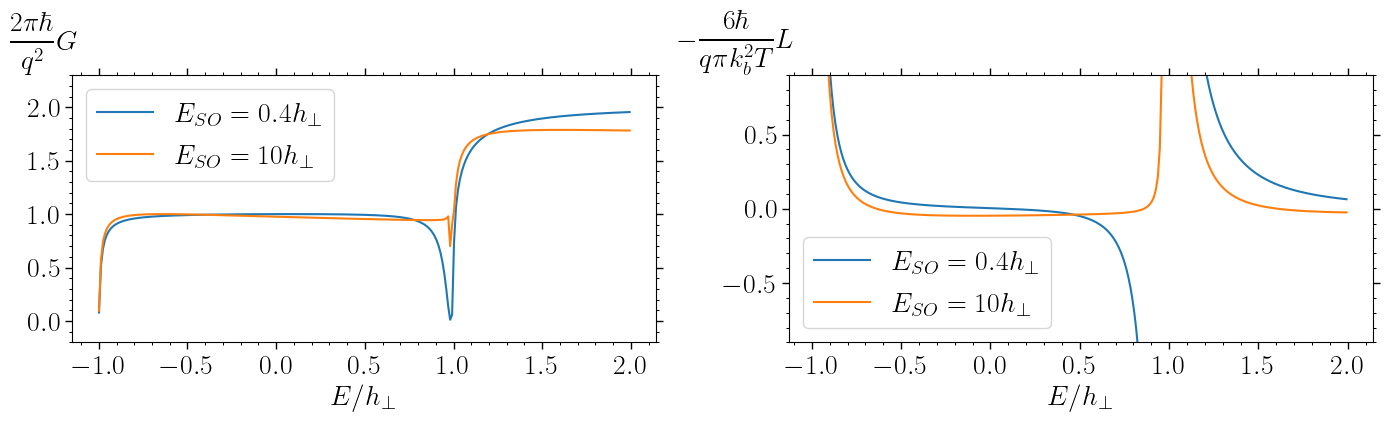

In [29]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, 2, figsize=(14, 4), dpi=100, tight_layout=True, facecolor='white')


# y_label = ["T", r"$$\frac{dT}{dE}$$"]
# font = {'family': "Times New Roman", "size": 25}

y_label_pos = [(-.05, 1), (-.09, 1)]

k = list(trasmission_coeff_total.keys())

n = 2
for j in range(len(k)//2):
    for ii in range(2):
        
        axs[ii].plot(en, 
                trasmission_coeff_total[k[n+j]][ii], 
                label=fr"$$E_{{SO}} = {k[n+j][1]}h_{{\perp}}$$")
#                 label=fr"$$L = {k[n+j][0]} k_z$$"+"\n"+fr"$$E_{{SO}} = {k[n+j][1]}h_{{\perp}}$$")
#         axs[ii].plot(en, 
#                 trasmission_coeff_total[k[n+1]][ii], 
#                 label=fr"$$L = {k[n+1][0]} k_z$$"+"\n"+fr"$$E_{{SO}} = {k[n+1][1]}h_{{\perp}}$$")

        axs[ii].legend(fontsize = legend_font_size)
#         axs[ii].grid(True)#which='both')
        axs[ii].set_xlabel(r"$$E/h_\perp$$", fontdict=font)
        axs[ii].set_ylabel(y_label[ii], rotation=0, fontdict=font)
        axs[ii].yaxis.set_label_coords(*y_label_pos[ii])
    print(k[n+j])
        


axs[0].set_ylim(-0.2, 2.3)
axs[1].set_ylim(-.9, .9)
    

x_magior = np.array([.5, .5])
x_minor = np.array([0.1, 0.1])

y_magior = np.array([0.5, .5])
y_minor = np.array([0.1, 0.1])
adjuct_Tick(axs, x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])





plt.savefig(BASE_PATH+"2_T(E)_for_E_[so,R]>>h_perp(0|alpha|0).pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

## gap $\alpha_l| 0 | \alpha_r$, right Rashba dominated $E_{so, R} \gg h_\perp$

### T vs $E_{so, l}$ at fixed  $d$ and $E$

In [76]:
alp_r = 10
Eso_profile = [1, 0, alp_r]
x_profile = [0, 1]

junction = RachbaJunction([x_profile, Eso_profile])


def g(x, par):
    
    if par[1] < -1 and np.abs(x) < 0.5 or -np.abs(x)*(1+(1/(2*np.abs(x)))**2) > par[1]:
        return np.nan
    else:
        junction[0] = x
        junction.interface[0] = -par[0]/2
        junction.interface[1] = par[0]/2
        
        S = junction.get_scattering_matrix(par[1])
        if not S.is_unitary:
            print(f"not unitary matrix length: {x}, E_so: {par}")
            return np.nan
        else:
            return S.t_coef
    

def gp(x, par):
    dx = 0.0001
    if (par[1]+dx) < -1 and np.abs(x) < 0.5 or -np.abs(x)*(1+(1/(2*np.abs(x)))**2) > (par[1]+dx):
        return np.nan
    else:
        
        junction[1] = x
        junction.interface[0] = -par[0]/2
        junction.interface[1] = par[0]/2
    
        S1 = junction.get_scattering_matrix(par[1]-dx/2)
        S2 = junction.get_scattering_matrix(par[1]+dx/2)
        if not S1.is_unitary and S2.is_unitary:
            print(f"not unitary matrix length: {x}, E_so: {par}")
            return np.nan
        else:
            return (-S1.t_coef + S2.t_coef)/dx

param = [(0.3, -1.02), (0.3, 0), (0.3, 1.2), (1, -1.02), (1, 0), (1, 1.2)]
eso_l = np.arange(-10, 10, 0.011)
trasmission_coeff_total = make_grid(eso_l, param, [g, gp])


(0.3, -1.02)
(0.3, 0)
(0.3, 1.2)


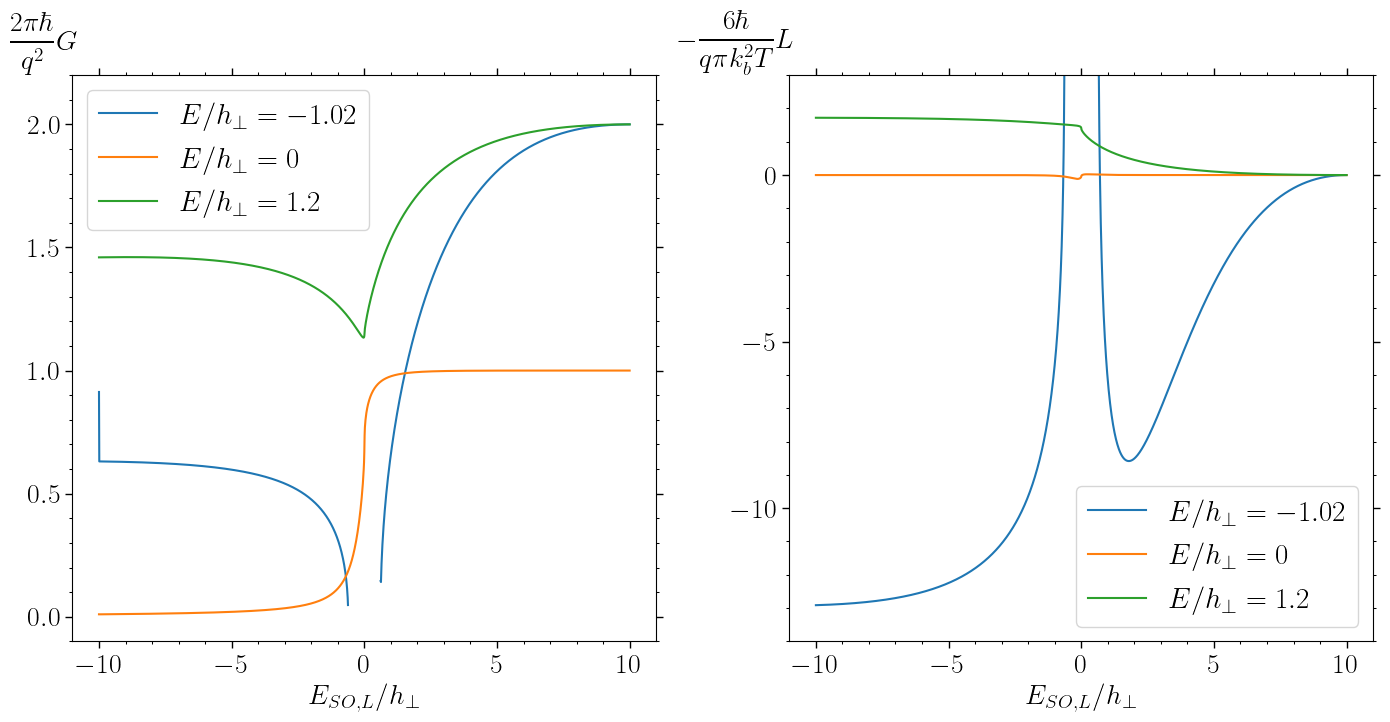

In [78]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

# renormallize_result(trasmission_coeff_total)

fig, axs = plt.subplots(1, 2, figsize=(14, 7), dpi=100, tight_layout=True, facecolor='white')


# y_label = ["T", r"$$\frac{dT}{dE}$$"]
# font = {'family': "Times New Roman", "size": 25}

y_label_pos = [(-.05, 1), (-.09, 1)]

k = list(trasmission_coeff_total.keys())
n = 0
for j in range(3):
    
    for ii in range(2):
        
        axs[ii].plot(eso_l, 
                trasmission_coeff_total[k[n+j]][ii],
                label=fr"$$ E/ h_{{\perp}} = {k[n+j][1]}$$")

        axs[ii].legend(fontsize = legend_font_size)
#         axs[ii].grid(True)#which='both')
        axs[ii].set_xlabel(r"$$E_{{SO,L}}/h_\perp$$", fontdict=font)
        axs[ii].set_ylabel(y_label[ii], rotation=0, fontdict=font)
        axs[ii].yaxis.set_label_coords(*y_label_pos[ii])
    print(k[n+j])
        
legend_font_size = 21

x_magior = np.array([5, 5])
x_minor = np.array([1, 1])

y_magior = np.array([0.5, 5])
y_minor = np.array([0.1, 1])
adjuct_Tick(axs, x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


axs[0].set_ylim(-.1, 2.2)
axs[1].set_ylim(-14, 3)


plt.savefig(BASE_PATH+"1_T(E_[so, l])_for_constant_energy_and_E_[so,R]>>h_perp(alpha_l|0|alpha_r).pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

(1, -1.02)
(1, 0)
(1, 1.2)


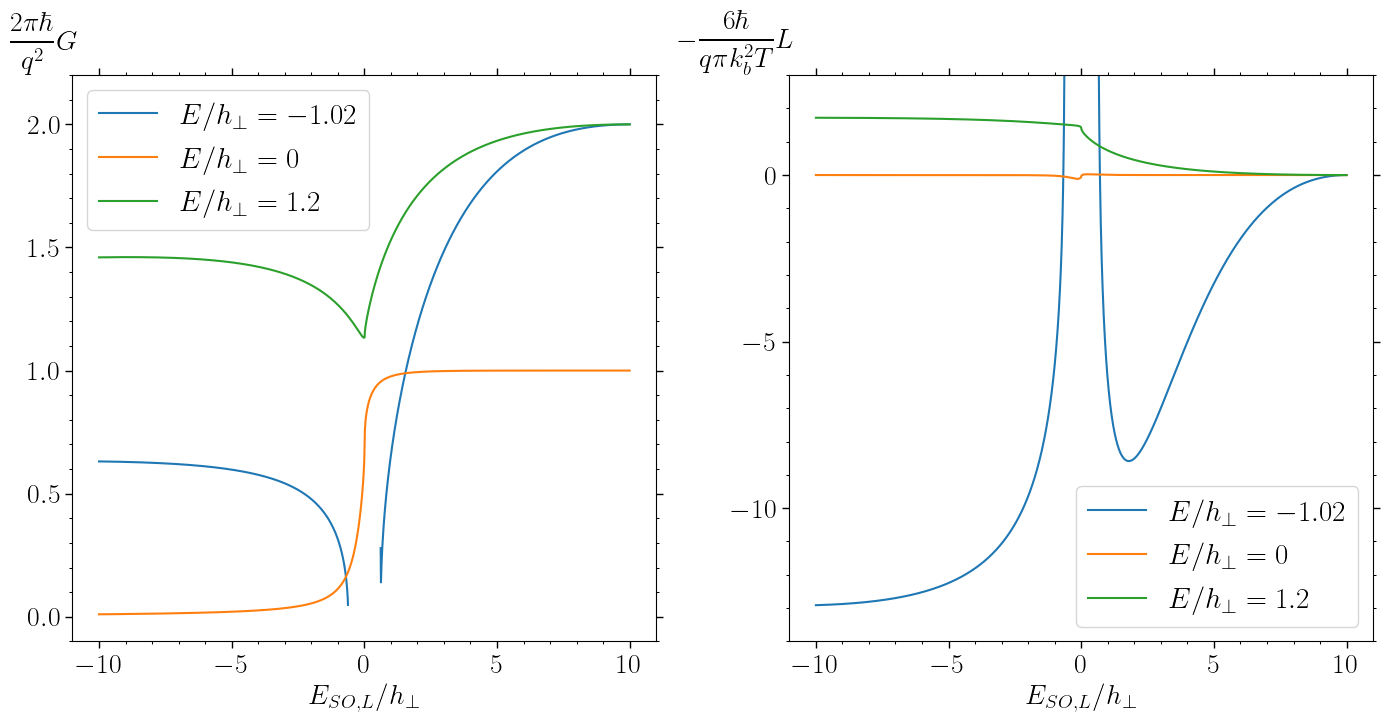

In [79]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

# renormallize_result(trasmission_coeff_total)

fig, axs = plt.subplots(1, 2, figsize=(14, 7), dpi=100, tight_layout=True, facecolor='white')


# y_label = ["T", r"$$\frac{dT}{dE}$$"]
# font = {'family': "Times New Roman", "size": 25}

y_label_pos = [(-.05, 1), (-.09, 1)]

k = list(trasmission_coeff_total.keys())
n = 3
for j in range(3):
    
    for ii in range(2):
        
        axs[ii].plot(eso_l, 
                trasmission_coeff_total[k[n+j]][ii],
                label=fr"$$ E/ h_{{\perp}} = {k[n+j][1]}$$")

        axs[ii].legend(fontsize = legend_font_size)
#         axs[ii].grid(True)#which='both')
        axs[ii].set_xlabel(r"$$E_{{SO,L}}/h_\perp$$", fontdict=font)
        axs[ii].set_ylabel(y_label[ii], rotation=0, fontdict=font)
        axs[ii].yaxis.set_label_coords(*y_label_pos[ii])
    print(k[n+j])

legend_font_size = 21

x_magior = np.array([5, 5])
x_minor = np.array([1, 1])

y_magior = np.array([0.5, 5])
y_minor = np.array([0.1, 1])
adjuct_Tick(axs, x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


axs[0].set_ylim(-.1, 2.2)
axs[1].set_ylim(-14, 3)


plt.savefig(BASE_PATH+"2_T(E_[so, l])_for_constant_energy_and_E_[so,R]>>h_perp(alpha_l|0|alpha_r).pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


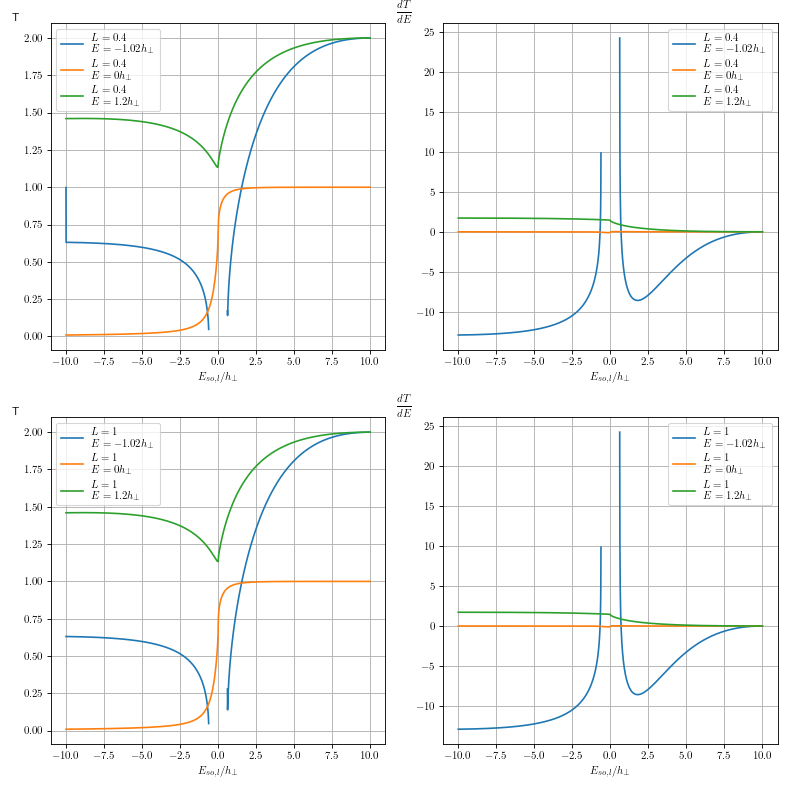

IndexError: index 2 is out of bounds for axis 0 with size 2

In [269]:
# %matplotlib inline
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

y_label = ["T", r"$$\frac{dT}{dE}$$"]

k = list(trasmission_coeff_total.keys())
n = 0
for i in range(len(trasmission_coeff_total)//2):
    for j in range(2):
        axs[i, j].plot(eso_l, 
                trasmission_coeff_total[k[n]][j], 
                label=fr"$$L = {k[n][0]}$$"+"\n"+fr"$$E = {k[n][1]}h_{{\perp}}$$")
        axs[i, j].plot(eso_l, 
                trasmission_coeff_total[k[n+1]][j], 
                label=fr"$$L = {k[n+1][0]}$$"+"\n"+fr"$$E = {k[n+1][1]}h_{{\perp}}$$")
        axs[i, j].plot(eso_l, 
                trasmission_coeff_total[k[n+2]][j], 
                label=fr"$$L = {k[n+2][0]}$$"+"\n"+fr"$$E = {k[n+2][1]}h_{{\perp}}$$")

        axs[i, j].legend()
        axs[i, j].grid(True)#which='both')
        axs[i, j].set_xlabel(r"$$E_{so,l}/h_\perp$$")
        axs[i, j].set_ylabel(y_label[j], loc = 'top', rotation=0)
#         axs[i, j].set_ylim(-0.2, 2)
        
    n += 3


fig.suptitle(fr"$$E_{{so, R}} = {alp_r} h_\perp$$", fontsize=16)
      
# plt.savefig("T(E_SO) at cconstant energy.png", transparent = False)
plt.show()

### T vs $E$ for fixed $E_{so}$, $d$

In [34]:
alp_r = 10
Eso_profile = [1, 0, alp_r]
x_profile = [0, 1]

junction = RachbaJunction([x_profile, Eso_profile])


def g(x, par):
    if x < -1 and np.abs(par[1]) < 0.5 or -np.abs(par[1])*(1+(1/(2*np.abs(par[1])))**2) > x:
        return np.nan
    else:
        junction[0] = par[1]
        junction.interface[0] = -par[0]/2
        junction.interface[1] = par[0]/2
        
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: {x}, E_so: {par}")
            return np.array([np.nan, np.nan])
        else:
            return S.t_coef
    

def gp(x, par):
    dx = 0.0001
    if (x+dx) < -1 and np.abs(par[1]) < 0.5 or -np.abs(par[1])*(1+(1/(2*np.abs(par[1])))**2) > (x+dx):
        return np.nan
    else:
        junction[0] = par[1]
        junction.interface[0] = -par[0]/2
        junction.interface[1] = par[0]/2
    
        S1 = junction.get_scattering_matrix(x-dx/2)
        S2 = junction.get_scattering_matrix(x+dx/2)
        if not S1.is_unitary and S2.is_unitary:
            print(f"not unitary matrix length: {x}, E_so: {par}")
            return np.array([np.nan, np.nan])
        else:
            return (-S1.t_coef + S2.t_coef)/dx

param = [(0.3, 0.4), (0.3, 10), (1, 0.4), (1, 10)]
en = np.arange(-1.2, 2, 0.011)
trasmission_coeff_total = make_grid(en, param, [g, gp])


renormallize_result(trasmission_coeff_total, dy = 25)

(0.3, 0.4)
(0.3, 10)


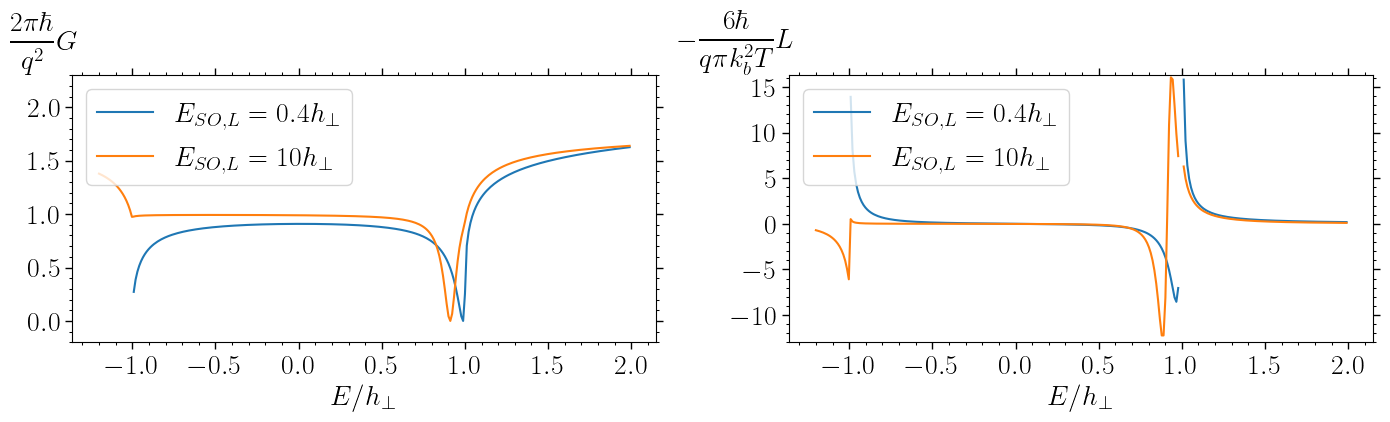

In [35]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, 2, figsize=(14, 4), dpi=100, tight_layout=True, facecolor='white')

y_label_pos = [(-.05, 1), (-.09, 1)]

k = list(trasmission_coeff_total.keys())

n = 0
for j in range(len(k)//2):
    for ii in range(2):
        
        axs[ii].plot(en, 
                trasmission_coeff_total[k[n+j]][ii], 
                label=fr"$$E_{{SO,L}} = {k[n+j][1]}h_{{\perp}}$$")
#                 label=fr"$$L = {k[n+j][0]} k_z$$"+"\n"+fr"$$E_{{SO}} = {k[n+j][1]}h_{{\perp}}$$")
#         axs[ii].plot(en, 
#                 trasmission_coeff_total[k[n+1]][ii], 
#                 label=fr"$$L = {k[n+1][0]} k_z$$"+"\n"+fr"$$E_{{SO}} = {k[n+1][1]}h_{{\perp}}$$")

        axs[ii].legend(fontsize = legend_font_size)
#         axs[ii].grid(True)#which='both')
        axs[ii].set_xlabel(r"$$E/h_\perp$$", fontdict=font)
        axs[ii].set_ylabel(y_label[ii], rotation=0, fontdict=font)
        axs[ii].yaxis.set_label_coords(*y_label_pos[ii])
    print(k[n+j])       
        
axs[0].set_ylim(-0.2, 2.3)
axs[1].set_ylim(-13, 16.3)
    

x_magior = np.array([.5, .5])
x_minor = np.array([0.1, 0.1])

y_magior = np.array([0.5, 5])
y_minor = np.array([0.1, 1])
adjuct_Tick(axs, x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.savefig(BASE_PATH+"1_T(E)_for_E_[so,R]>>h_perp(alpha_l|0|alpha_r).pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

(1, 0.4)
(1, 10)


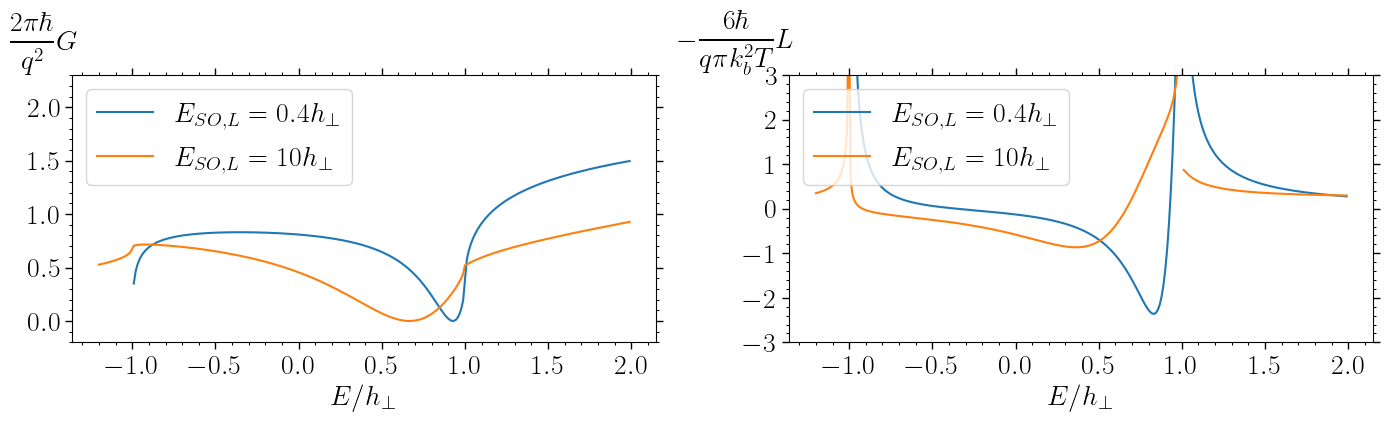

In [36]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, 2, figsize=(14, 4), dpi=100, tight_layout=True, facecolor='white')


# y_label = ["T", r"$$\frac{dT}{dE}$$"]
# font = {'family': "Times New Roman", "size": 25}

y_label_pos = [(-.05, 1), (-.09, 1)]

k = list(trasmission_coeff_total.keys())

n = 2
for j in range(len(k)//2):
    for ii in range(2):
        
        axs[ii].plot(en, 
                trasmission_coeff_total[k[n+j]][ii], 
                label=fr"$$E_{{SO,L}} = {k[n+j][1]}h_{{\perp}}$$")
#                 label=fr"$$L = {k[n+j][0]} k_z$$"+"\n"+fr"$$E_{{SO}} = {k[n+j][1]}h_{{\perp}}$$")
#         axs[ii].plot(en, 
#                 trasmission_coeff_total[k[n+1]][ii], 
#                 label=fr"$$L = {k[n+1][0]} k_z$$"+"\n"+fr"$$E_{{SO}} = {k[n+1][1]}h_{{\perp}}$$")

        axs[ii].legend(fontsize = legend_font_size)
#         axs[ii].grid(True)#which='both')
        axs[ii].set_xlabel(r"$$E/h_\perp$$", fontdict=font)
        axs[ii].set_ylabel(y_label[ii], rotation=0, fontdict=font)
        axs[ii].yaxis.set_label_coords(*y_label_pos[ii])
        
    print(k[n+j])        


axs[0].set_ylim(-0.2, 2.3)
axs[1].set_ylim(-3, 3)
    

x_magior = np.array([.5, .5])
x_minor = np.array([0.1, 0.1])

y_magior = np.array([0.5, 1])
y_minor = np.array([0.1, .2])
adjuct_Tick(axs, x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])





plt.savefig(BASE_PATH+"2_T(E)_for_E_[so,R]>>h_perp(alpha_l|0|alpha_r).pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()